### Notebook for testing task for Boston Gene

In [2]:
# Imports

import pandas as pd
import numpy as np
import os
import sys

#### Databases

In [127]:
# creating expression dataframe
exp_data = pd.read_csv('data/expression_table_normalised_icgc.txt', sep="\t")
exp_data.rename(columns={exp_data.columns[0]: 'gene_id'}, inplace=True)
exp_data.head()

,gene_id,ICGC_0006,ICGC_0007,ICGC_0009,ICGC_0075,ICGC_0354,ICGC_0020,ICGC_0021,ICGC_0025,ICGC_0026,...,ICGC_0535,ICGC_0536,ICGC_0502,ICGC_0503,ICGC_0518,ICGC_0507,ICGC_0521,ICGC_0522,ICGC_0526,ICGC_0543
0,ENSG00000000003,4.935214,5.114459,5.375416,4.272855,3.585551,4.728254,5.411612,5.620586,4.817511,...,3.332555,4.157640,4.483416,4.951604,3.836224,3.972830,5.382327,4.308381,4.732541,5.140055
1,ENSG00000000419,4.034635,4.599332,4.587680,3.472525,4.173737,4.401976,4.386663,4.806422,4.443624,...,4.601348,4.409019,3.740030,4.300386,4.783368,3.927274,4.001015,3.272052,4.162536,5.284458
2,ENSG00000000457,3.925488,3.907000,3.638524,4.197544,3.757676,4.111593,3.495744,3.551271,3.676183,...,3.672093,3.511688,4.069200,3.900946,3.947078,3.994728,4.569100,4.477992,4.283187,3.101123
3,ENSG00000000460,2.483618,2.660843,3.214169,2.842177,3.559219,2.621409,3.198682,4.087306,2.686024,...,2.918784,2.919825,2.932658,2.092648,3.056026,2.653496,3.048836,3.573936,2.998799,3.477693
4,ENSG00000000938,2.484806,1.750494,2.794076,2.353310,1.440256,3.264178,3.445729,3.103411,2.527272,...,3.614184,2.795686,1.654626,1.726623,2.372235,1.157676,1.311957,3.346237,2.786160,2.123467


In [98]:
# gene names and ids table which was given
name_id_table = pd.read_csv('data/ensembl_table', sep="\t")
name_id_table.head()

,#id,gene,chrom,chromStart,chromEnd,strand
0,ENSG00000111671,SPSB2,chr12,6980098,6998522,-
1,ENSG00000110514,MADD,chr11,47290711,47351582,+
2,ENSG00000086015,MAST2,chr1,46252658,46501796,+
3,ENSG00000255071,SAA2-SAA4,chr11,18252969,18270182,-
4,ENSG00000169740,ZNF32,chr10,44139306,44144304,-


In [99]:
# gene names and ids table from ensembl martview
name_id_table_mart = pd.read_csv('data/mart_export_gene_name.txt')

rename_dict = dict(zip(list(name_id_table_mart.columns.values), ['gene_id', 'gene_id_v', 'gene_name']))
name_id_table_mart.rename(columns = rename_dict, inplace=True)
name_id_table_mart.head()

,gene_id,gene_id_v,gene_name
0,ENSG00000210049,ENSG00000210049.1,MT-TF
1,ENSG00000211459,ENSG00000211459.2,MT-RNR1
2,ENSG00000210077,ENSG00000210077.1,MT-TV
3,ENSG00000210082,ENSG00000210082.2,MT-RNR2
4,ENSG00000209082,ENSG00000209082.1,MT-TL1


In [126]:
# for-loop to find out gene names for given ids
# note: this loop is here, because for some genes there are no names,
# so we will call such genes as 'broken_gene'
gene_names = []
broken_genes = []

for gene_id in exp_data.gene_id:
    try:
        gene_names.append(name_id_table.loc[name_id_table['#id'] == gene_id].gene.values[0])
    except:
        gene_names.append('broken_gene')
        broken_genes.append(gene_id)

In [128]:
# final database

exp_data.insert(1, 'gene_name', gene_names)
exp_data.head()

,gene_id,gene_name,ICGC_0006,ICGC_0007,ICGC_0009,ICGC_0075,ICGC_0354,ICGC_0020,ICGC_0021,ICGC_0025,...,ICGC_0535,ICGC_0536,ICGC_0502,ICGC_0503,ICGC_0518,ICGC_0507,ICGC_0521,ICGC_0522,ICGC_0526,ICGC_0543
0,ENSG00000000003,TSPAN6,4.935214,5.114459,5.375416,4.272855,3.585551,4.728254,5.411612,5.620586,...,3.332555,4.157640,4.483416,4.951604,3.836224,3.972830,5.382327,4.308381,4.732541,5.140055
1,ENSG00000000419,DPM1,4.034635,4.599332,4.587680,3.472525,4.173737,4.401976,4.386663,4.806422,...,4.601348,4.409019,3.740030,4.300386,4.783368,3.927274,4.001015,3.272052,4.162536,5.284458
2,ENSG00000000457,SCYL3,3.925488,3.907000,3.638524,4.197544,3.757676,4.111593,3.495744,3.551271,...,3.672093,3.511688,4.069200,3.900946,3.947078,3.994728,4.569100,4.477992,4.283187,3.101123
3,ENSG00000000460,C1orf112,2.483618,2.660843,3.214169,2.842177,3.559219,2.621409,3.198682,4.087306,...,2.918784,2.919825,2.932658,2.092648,3.056026,2.653496,3.048836,3.573936,2.998799,3.477693
4,ENSG00000000938,FGR,2.484806,1.750494,2.794076,2.353310,1.440256,3.264178,3.445729,3.103411,...,3.614184,2.795686,1.654626,1.726623,2.372235,1.157676,1.311957,3.346237,2.786160,2.123467


In [198]:
# taking part from exp_data where won't be 'broken_gene'
# we can take only "not broke" genes
#expression_dataframe = exp_data.loc[exp_data['gene_name'] != 'broken_gene']
# or all of them
expression_dataframe = exp_data

print(exp_data.shape)
print(expression_dataframe.shape)

(18278, 98)
(18278, 98)


#### Broken genes

In [125]:
#'ENSG00000005955' in name_id_table
#'ENSG00000210049' in name_id_table.gene_id
#print(name_id_table.loc[name_id_table['#id'] == 'ENSG00000006114'])
print(name_id_table_mart.loc[name_id_table_mart['gene_id'] == 'EENSG00000006114'])

Empty DataFrame
Columns: [gene_id, gene_id_v, gene_name]
Index: []


In [129]:
exp_data.loc[exp_data['gene_name'] == 'broken_gene'].head()

,gene_id,gene_name,ICGC_0006,ICGC_0007,ICGC_0009,ICGC_0075,ICGC_0354,ICGC_0020,ICGC_0021,ICGC_0025,...,ICGC_0535,ICGC_0536,ICGC_0502,ICGC_0503,ICGC_0518,ICGC_0507,ICGC_0521,ICGC_0522,ICGC_0526,ICGC_0543
3714,ENSG00000112664,broken_gene,4.693546,4.038044,4.886379,3.753149,3.627779,4.546919,4.820432,4.285000,...,4.081546,4.246030,4.095481,4.215462,4.206276,4.175211,4.144277,3.848215,4.014745,4.742386
4540,ENSG00000120087,broken_gene,1.789388,1.744969,1.906567,1.822449,3.391405,1.722849,3.202831,3.535347,...,0.978817,1.712759,3.738991,2.620164,-0.522862,2.651291,4.146965,1.947153,3.099085,1.800168
4650,ENSG00000121083,broken_gene,5.136512,4.899977,4.645980,5.167521,5.035973,4.657140,4.437639,5.560182,...,5.364553,5.319549,4.929855,5.571250,5.048485,5.435113,5.852175,3.989615,5.742923,5.673917
5310,ENSG00000127688,broken_gene,3.119708,4.484744,4.335902,3.951604,5.315805,4.336052,4.669890,4.280446,...,4.287040,4.026894,5.001484,4.135829,4.943669,4.565042,5.660356,5.357861,3.460913,4.728115
6987,ENSG00000139617,broken_gene,-1.352647,-2.941959,-3.484852,-6.456231,1.650074,0.016062,-2.407230,0.167268,...,-0.524575,0.120612,0.045192,-0.192103,-0.858430,0.899779,1.149841,0.066097,-2.473422,-1.458277


#### Annotation

In [130]:
annotation_table = pd.read_csv('data/annotation_table.txt', sep="\t", names = ['icgc_id', 'subtype'], header=0)

annotation_table.head()

,icgc_id,subtype
0,ICGC_0543,Squamous
1,ICGC_0522,Squamous
2,ICGC_0521,Squamous
3,ICGC_0535,Squamous
4,ICGC_0313,Squamous


In [134]:
subtype_lst = set(list(annotation_table.subtype))

print('Subtype: number of samples')

for subtype in subtype_lst:
    num_samples = len(annotation_table.loc[annotation_table['subtype'] == subtype].values)
    print(f'{subtype}: {num_samples}')

Subtype: number of samples
ADEX: 16
Pancreatic Progenitor: 30
Squamous: 25
Immunogenic: 25


#### TODO Batch-effect

### PCA

In [194]:
import sklearn.decomposition
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('axes',edgecolor='w')

In [139]:
expression_dataframe.head()

,gene_id,gene_name,ICGC_0006,ICGC_0007,ICGC_0009,ICGC_0075,ICGC_0354,ICGC_0020,ICGC_0021,ICGC_0025,...,ICGC_0535,ICGC_0536,ICGC_0502,ICGC_0503,ICGC_0518,ICGC_0507,ICGC_0521,ICGC_0522,ICGC_0526,ICGC_0543
0,ENSG00000000003,TSPAN6,4.935214,5.114459,5.375416,4.272855,3.585551,4.728254,5.411612,5.620586,...,3.332555,4.157640,4.483416,4.951604,3.836224,3.972830,5.382327,4.308381,4.732541,5.140055
1,ENSG00000000419,DPM1,4.034635,4.599332,4.587680,3.472525,4.173737,4.401976,4.386663,4.806422,...,4.601348,4.409019,3.740030,4.300386,4.783368,3.927274,4.001015,3.272052,4.162536,5.284458
2,ENSG00000000457,SCYL3,3.925488,3.907000,3.638524,4.197544,3.757676,4.111593,3.495744,3.551271,...,3.672093,3.511688,4.069200,3.900946,3.947078,3.994728,4.569100,4.477992,4.283187,3.101123
3,ENSG00000000460,C1orf112,2.483618,2.660843,3.214169,2.842177,3.559219,2.621409,3.198682,4.087306,...,2.918784,2.919825,2.932658,2.092648,3.056026,2.653496,3.048836,3.573936,2.998799,3.477693
4,ENSG00000000938,FGR,2.484806,1.750494,2.794076,2.353310,1.440256,3.264178,3.445729,3.103411,...,3.614184,2.795686,1.654626,1.726623,2.372235,1.157676,1.311957,3.346237,2.786160,2.123467


In [204]:
# Preparing data for PCA
X_data = expression_dataframe.to_numpy()[:, 2:]

X_data = X_data.T

print(X_data[:3,:])

Y_data = list(expression_dataframe.columns)[2:]

print(Y_data[:5])

[[4.935213582 4.034635376000001 3.9254882510000004 ... 3.4359256030000003
  0.495504209 4.5512988430000005]
 [5.114458613 4.599332111 3.907000378 ... 2.513643287
  -0.18644550899999998 4.717990574]
 [5.3754155610000005 4.587680279 3.6385235280000003 ... 2.383767605
  -0.759674869 4.712031321]]
['ICGC_0006', 'ICGC_0007', 'ICGC_0009', 'ICGC_0075', 'ICGC_0354']


In [200]:
# Making composition
pca_composition = sklearn.decomposition.PCA(n_components=2)
pca_X = pca_composition.fit_transform(X_data)
pca_Y = [annotation_table.loc[annotation_table.icgc_id == sample].subtype.values[0] for sample in Y_data]

In [201]:
# We will make helpful dataframe
pca_df = pd.DataFrame(data = pca_X, columns=['pca_1', 'pca_2'])

pca_df.insert(0, 'subtype', pca_Y)

pca_df.head()

,subtype,pca_1,pca_2
0,ADEX,-54.671690,-41.170023
1,Immunogenic,-18.735978,-1.906834
2,Squamous,116.016638,44.131260
3,ADEX,-39.261198,-39.298998
4,ADEX,4.855115,-93.435740


<Figure size 432x288 with 0 Axes>

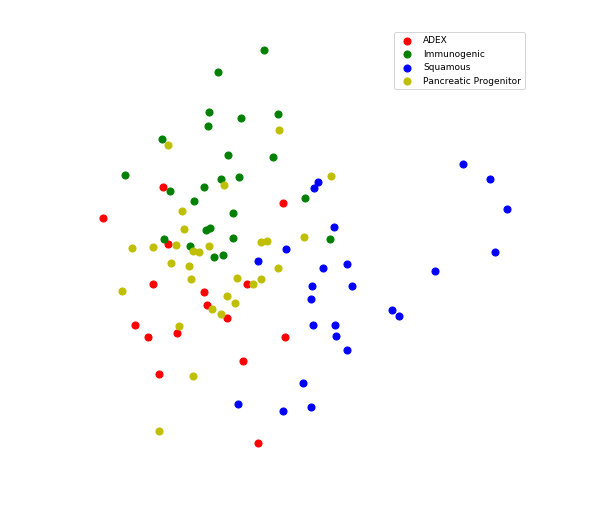

In [210]:
plt.figure()
plt.figure(figsize=(8,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20, c='w')
plt.ylabel('Principal Component - 2',fontsize=20, c='w')
plt.title("Principal Component Analysis of Pancreatic Cancer Dataset",fontsize=20, c='w')
plt.tick_params(axis='x', colors='w')
plt.tick_params(axis='y', colors='w')
targets = ['ADEX', 'Immunogenic', 'Squamous', 'Pancreatic Progenitor']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['subtype'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'pca_1']
               , pca_df.loc[indicesToKeep, 'pca_2'], c = color, s = 50)

plt.legend(targets,prop={'size': 9})
plt.show()

#### Machine learning model just to try

In [212]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=250, max_depth = 15, max_features = 5000)


forest.fit(X_data)

ModuleNotFoundError: No module named 'sklearn.ensemble.RandomForestClassifier'

In [214]:
X_data.shape

(96, 18278)

#### Defining genes with abnormal expresison